# Zomato Data Analysis Using Python


Author : Modi Dev Gautamkumar

Date : July 20,2025
# overview
This notebook performing Exploratory Data Analysis(EDA) and visualization for Zomato's food delivery business, using customer and restaurant data using Zomato data.csv dataset. 

# Project Objectives:

1. Find most popular restaurant types.
2. Count votes received by each type.
3. Identify common Restaurant ratings.
4. Calculate average spending by couples ordering online.
5. Compare ratings for online vs. offline modes.
6. Discover restaurant types with more offline orders for targeted offers.

# Dataset Download

To acquire the Zomato data.csv dataset, was downloaded manually from Kaggle by navigating to the Credit Card Fraud Detection dataset page. The file was then saved locally and placed in the current working directory for use in this notebook.

# Required Library Imports
To support the analysis and modeling tasks in this credit card fraud detection project, several essential Python libraries are utilized. Below is an explanation of the core libraries imported for this notebook:

NumPy: Used for efficient numerical computations, enabling operations on arrays and matrices, which are critical for data manipulation and mathematical calculations in the dataset.

Pandas: Employed for data handling and preprocessing, providing powerful tools to load, clean, and transform the creditcard.csv dataset into a structured format suitable for analysis.

Matplotlib: Utilized for creating static visualizations, such as plots and charts, to illustrate patterns and model performance during exploratory data analysis and evaluation.

Seaborn: A visualization library built on Matplotlib, used to generate enhanced, aesthetically pleasing graphs, such as heatmaps and distribution plots, to better understand the data and relationships.

These libraries form the foundation for data processing, analysis, and visualization throughout the project, ensuring efficient and effective execution of all tasks.

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the Dataset and Create Dataframe 

The Zomato data.csv dataset is loaded into the notebook using the Pandas library's read_csv function, which efficiently reads the CSV file into a DataFrame for further analysis. Finally, the DataFrame is displayed to provide an initial overview of the dataset, including its columns and sample rows, facilitating a quick understanding of its structure and contents. the .head() gives 1st 5 rows from dataset.


In [44]:
df = pd.read_csv("Zomato data .csv")
print(df.head())

                    name online_order book_table   rate  votes  \
0                  Jalsa          Yes        Yes  4.1/5    775   
1         Spice Elephant          Yes         No  4.1/5    787   
2        San Churro Cafe          Yes         No  3.8/5    918   
3  Addhuri Udupi Bhojana           No         No  3.7/5     88   
4          Grand Village           No         No  3.8/5    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


# Checking Dataset Shape
To understand the scale of the Zomato data.csv dataset, I examined its shape, which reveals the total number of rows and columns. Using the df.shape attribute, we found the dataset contains 148 rows and 7 columns.

In [47]:
df.shape

(148, 7)

# Listing All Column Names
To gain a clear understanding of the features in the Zomato data.csv dataset, I retrieve the names of all columns. By using the df.columns attribute, we obtain a list of all column headers, which helps identify the available variables, such as name, online_order. This step is essential for recognizing the dataset's structure and the features that will be used for analysis and modeling.

In [48]:
df.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes',
       'approx_cost(for two people)', 'listed_in(type)'],
      dtype='object')

# Dataset Info Summary
To understand the structure and properties of the Zomato data.csv dataset, I utilize the df.info() function, which provides essential metadata. This includes the count of non-null entries, the data types for each column, and the dataset's memory usage. This step is vital for detecting any missing values and determining the nature of the features available for analysis.

The dataset consists of 7 columns, all of which are numerical (including float and integer types) with no missing values, confirming a complete dataset suitable for subsequent processing and modeling.

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         148 non-null    object
 1   online_order                 148 non-null    object
 2   book_table                   148 non-null    object
 3   rate                         148 non-null    object
 4   votes                        148 non-null    int64 
 5   approx_cost(for two people)  148 non-null    int64 
 6   listed_in(type)              148 non-null    object
dtypes: int64(2), object(5)
memory usage: 8.2+ KB


# Statistical Summary of the Dataset
To explore the characteristics of the numerical features in the Zomato data.csv dataset, I employ the df.describe() function. This provides key statistical metrics, including the count, mean, and standard deviation, as well as the minimum, maximum, and quartile values (25th, 50th, and 75th percentiles) for each numerical column. This analysis is essential for understanding the distribution of the data and identifying potential outliers that may impact further processing and modeling.

In [51]:
df.describe()

,votes,approx_cost(for two people)
count,148.000000,148.000000
mean,264.810811,418.243243
std,653.676951,223.085098
min,0.000000,100.000000
25%,6.750000,200.000000
50%,43.500000,400.000000
75%,221.750000,600.000000
max,4884.000000,950.000000


# Checking for Missing Values
To ensure the Zomato data.csv dataset is ready for analysis, I examine it for missing values using the df.isna().sum() function. This method counts the number of NaN (null) values in each column, allowing us to assess whether data cleaning, such as imputation or removal of missing entries, is required. This step is critical for confirming the dataset's integrity before proceeding with further analysis and modeling. as you can see no null value found on dataset

In [52]:
df.isna().sum()

name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
approx_cost(for two people)    0
listed_in(type)                0
dtype: int64

# let's convert the data type of the "rate" column to float and remove denominator.

In [53]:
def handleRate(value):
    value=str(value).split('/')
    value=value[0];
    return float(value)

df['rate']=df['rate'].apply(handleRate)
print(df.head())
            

                    name online_order book_table  rate  votes  \
0                  Jalsa          Yes        Yes   4.1    775   
1         Spice Elephant          Yes         No   4.1    787   
2        San Churro Cafe          Yes         No   3.8    918   
3  Addhuri Udupi Bhojana           No         No   3.7     88   
4          Grand Village           No         No   3.8    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


# Conclusion - There is no NULL value in dataframe.

# 1) Type of Resturant

Text(0.5, 0, 'Type of restaurant')

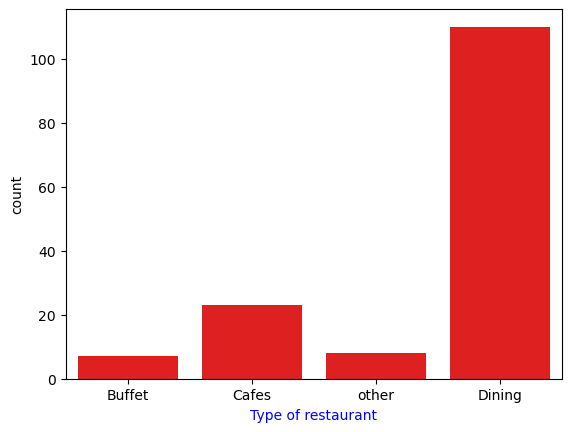

In [54]:
sns.countplot(x=df['listed_in(type)'],color='red')
plt.xlabel("Type of restaurant", color = 'blue')

# Conclusion: The majority of the restaurants fall into the dining category.

# 2) Dining restaurants are preferred by a larger number of individuals.

Text(0, 0.5, 'Votes')

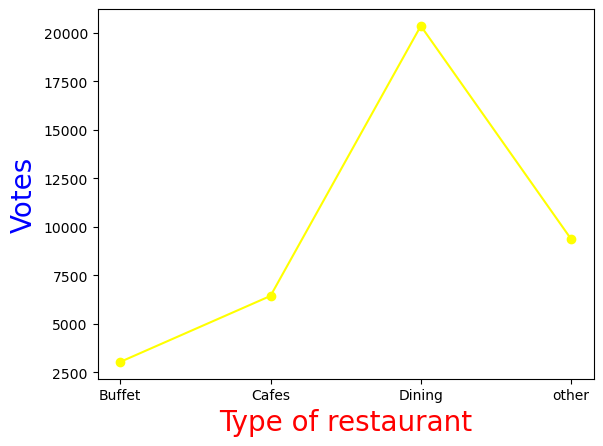

In [55]:
grouped_data = df.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame({'votes': grouped_data})
plt.plot(result, c="yellow", marker="o")
plt.xlabel("Type of restaurant", c="red", size=20)
plt.ylabel("Votes", c="blue", size=20)

 # 3) The Majority of restaurants received ratings

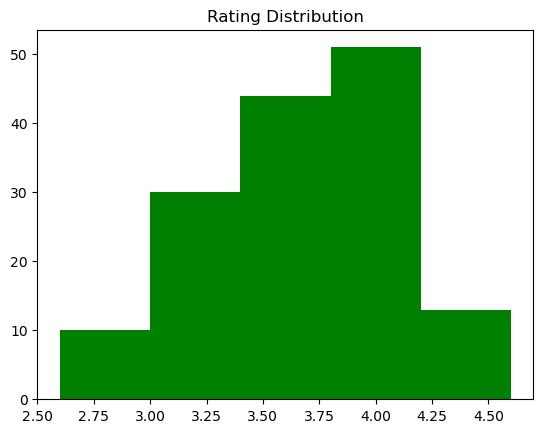

In [56]:
plt.hist(df['rate'],bins=5,color="green")
plt.title("Rating Distribution")
plt.show()

# Conclusion: The majority of restaurants received rating from 3.5 to 4.

# 4) The majority of couples prefer restaurants with an approximate cost of 300 rupees.


<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

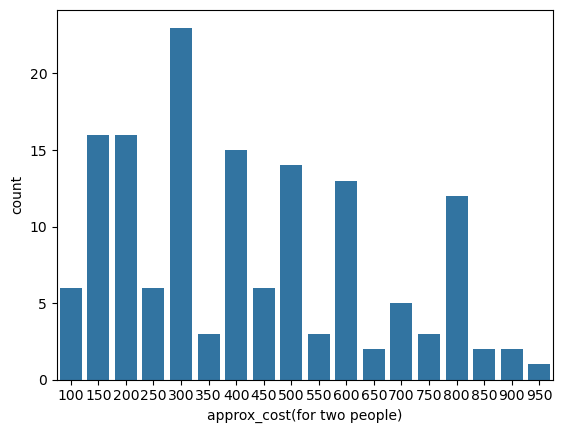

In [57]:
couple_data=df['approx_cost(for two people)']
sns.countplot(x=couple_data)

# 5) whether online orders receive higher ratings than offline orders.

<Axes: xlabel='online_order', ylabel='rate'>

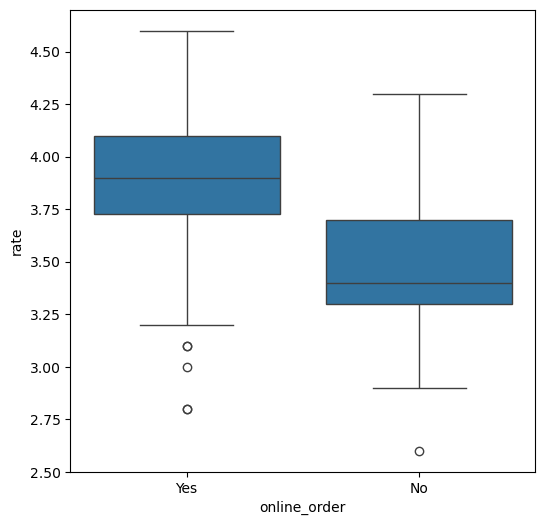

In [58]:
plt.figure(figsize = (6,6))
sns.boxplot(x = 'online_order', y = 'rate', data = df)


# 6) Offline orders received lower ratings in comparison to online orders, which obtained excellent ratings.

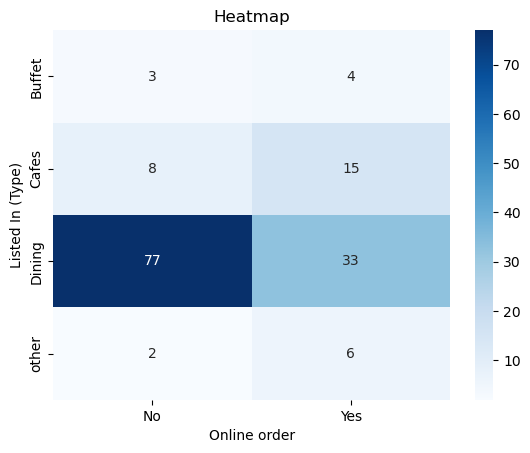

In [59]:
pivot_table = df.pivot_table(index='listed_in(type)', columns='online_order', aggfunc='size', fill_value=0)
sns.heatmap(pivot_table, annot=True, cmap="Blues", fmt='d')
plt.title("Heatmap")
plt.xlabel("Online order")
plt.ylabel("Listed In (Type)")
plt.show()


# Conclusion: Dining restaurants primarily accept offline orders, whereas cafes primarily receive online orders. This suggests that Clients prefer to place orders in person at restaurants, but prefer online ordering at cafes.